# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# Cell 1: Import Library
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Preprocessing & Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Library untuk Model & Evaluasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Library MLOps
!pip install mlflow
!pip install dagshub
import mlflow
import mlflow.sklearn
import dagshub

# Setting agar warning tidak memenuhi output
warnings.filterwarnings('ignore')

# Cek versi untuk memastikan sesuai syarat submission
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"MLflow version: {mlflow.__version__}")

Pandas version: 2.2.3
Numpy version: 2.1.3
MLflow version: 3.6.0


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
dataset_path = '../german_credit_data.csv'

try:
    # Membaca dataset
    df = pd.read_csv(dataset_path)
    print("Dataset berhasil dimuat!")
    
    # Menampilkan 5 baris pertama untuk pemeriksaan awal
    print("\n--- 5 Baris Teratas Data ---")
    display(df.head())

except FileNotFoundError:
    print(f"Error: File tidak ditemukan di path: {dataset_path}")

Dataset berhasil dimuat!

--- 5 Baris Teratas Data ---


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,2


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        954 non-null    int64 
 1   Age               954 non-null    int64 
 2   Sex               954 non-null    object
 3   Job               954 non-null    int64 
 4   Housing           954 non-null    object
 5   Saving accounts   779 non-null    object
 6   Checking account  576 non-null    object
 7   Credit amount     954 non-null    int64 
 8   Duration          954 non-null    int64 
 9   Purpose           954 non-null    object
 10  Credit Risk       954 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 82.1+ KB

Kolom dengan Missing Values:
Saving accounts     175
Checking account    378
dtype: int64

Jumlah Baris Duplikat: 0

Jumlah nilai unik per kolom:
Unnamed: 0          954
Age                  53
Sex                   2
Job                   4
Hou

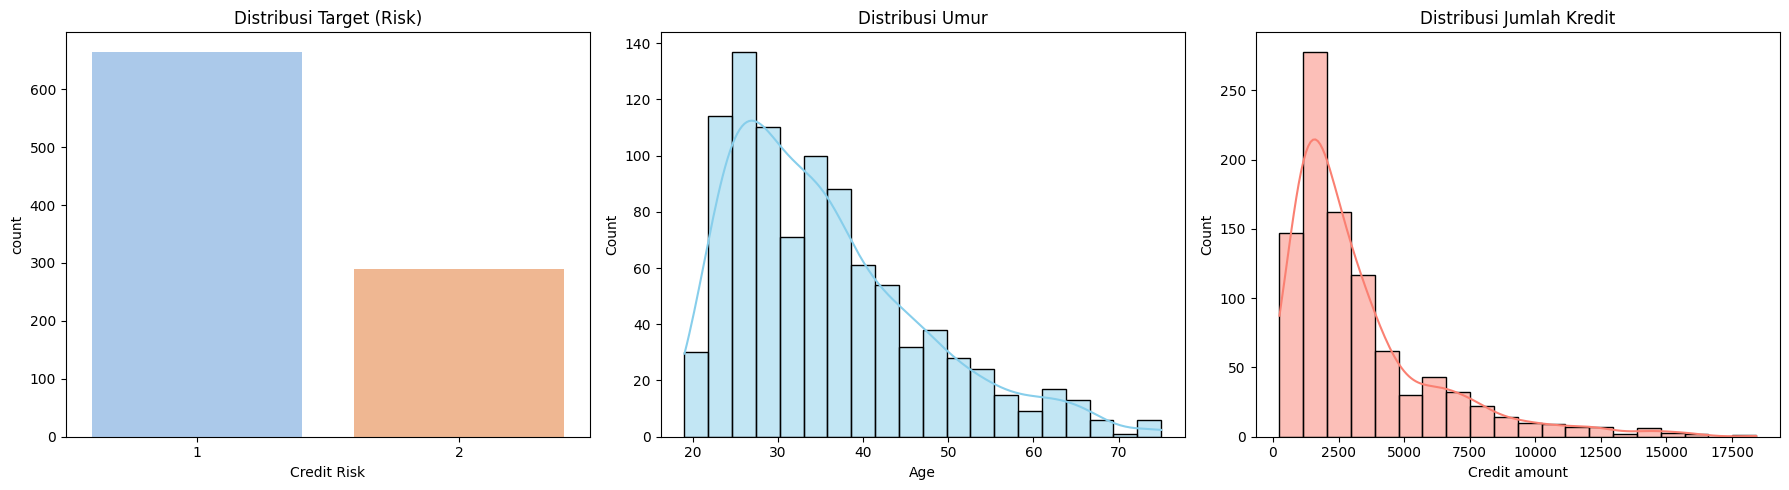

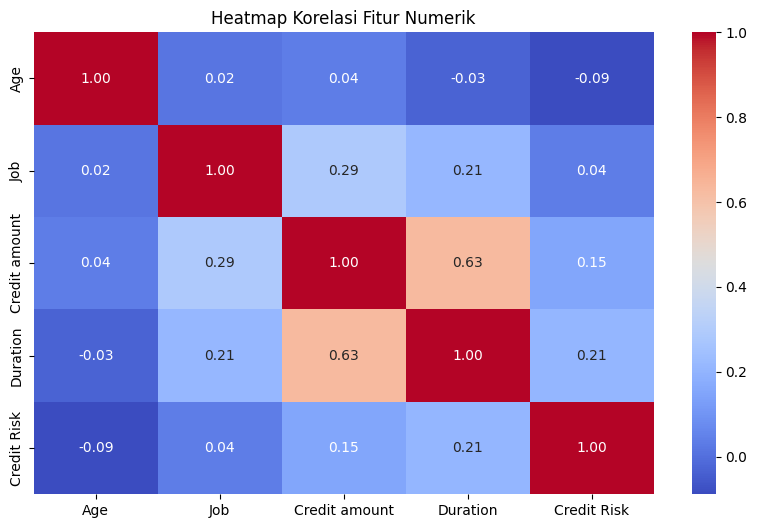

In [6]:
# STRUKTUR DATA
df.info()
missing = df.isnull().sum()
missing = missing[missing > 0]
print(f"\nKolom dengan Missing Values:\n{missing if not missing.empty else 'Tidak ada'}")
print(f"\nJumlah Baris Duplikat: {df.duplicated().sum()}")
print(f"\nJumlah nilai unik per kolom:")
print(df.nunique())

# 2. VISUALISASI DISTRIBUSI
plt.figure(figsize=(18, 5))

# Plot A: Target (Risk) - Cek Imbalance
plt.subplot(1, 3, 1)
sns.countplot(x='Credit Risk', data=df, palette='pastel')
plt.title('Distribusi Target (Risk)')

# Plot B: Numerik (Age) - Cek Outlier/Distribusi
plt.subplot(1, 3, 2)
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Umur')

# Plot C: Numerik (Credit Amount) - Cek Skewness
plt.subplot(1, 3, 3)
sns.histplot(df['Credit amount'], kde=True, bins=20, color='salmon')
plt.title('Distribusi Jumlah Kredit')

plt.tight_layout()
plt.show()

# 3. KORELASI
plt.figure(figsize=(10, 6))
# Hanya ambil kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=['number'])

# mengabaikan kolom "Unnamed:0"
if 'Unnamed: 0' in numeric_df.columns:
    numeric_df = numeric_df.drop('Unnamed: 0', axis=1)

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
df_clean = df.copy()

# Hapus kolom index tidak berguna
if 'Unnamed: 0' in df_clean.columns:
    df_clean.drop('Unnamed: 0', axis=1, inplace=True)

# Standarisasi nama target
target_col_name = 'Credit Risk'
if target_col_name in df_clean.columns:
    df_clean.rename(columns={target_col_name: 'Risk'}, inplace=True)
    print(f"✅ Sukses: Kolom '{target_col_name}' diubah namanya menjadi 'Risk'.")

# Handling Missing Values
cols_missing = ['Saving accounts', 'Checking account']
for col in cols_missing:
    if col in df_clean.columns:
        df_clean[col].fillna('unknown', inplace=True)

# Encoding (Mengubah Teks jadi Angka)
le = LabelEncoder()
# Cari semua kolom yang tipenya object (teks)
object_cols = df_clean.select_dtypes(include=['object']).columns

print("\nMelakukan Encoding pada:")
for col in object_cols:
    # Encode
    df_clean[col] = le.fit_transform(df_clean[col])
    print(f"- {col}")

# Scaling (Menyamakan Skala Angka)
scaler = StandardScaler()
# Scaling kolom numerik selain target 'Risk'
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.drop('Risk', errors='ignore')

df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])
print("\n✅ Scaling selesai untuk kolom numerik.")

# Simpan Data Bersih
output_filename = 'german_credit_preprocessing.csv'
df_clean.to_csv(output_filename, index=False)
print(f"✅ SUKSES! Data bersih disimpan sebagai: {output_filename}")

✅ Sukses: Kolom 'Credit Risk' diubah namanya menjadi 'Risk'.

Melakukan Encoding pada:
- Sex
- Housing
- Saving accounts
- Checking account
- Purpose

✅ Scaling selesai untuk kolom numerik.
✅ SUKSES! Data bersih disimpan sebagai: german_credit_preprocessing.csv
